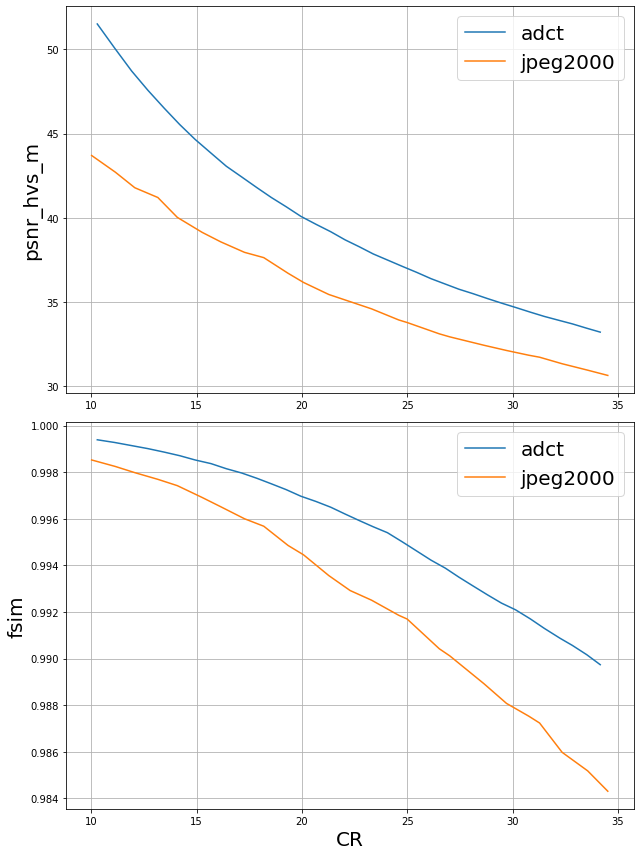

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Assuming you might need this for image processing
from skimage import io, img_as_float, color


# Read raw pixel data directly
def read_raw(raw_image):
    with open(raw_image, 'rb') as f:
        # Specify dimensions and data type
        image = np.fromfile(f, dtype=np.uint8).reshape((568 , 1000))
    
    if image.ndim == 3: 
        image = color.rgb2gray(image) # Convert to grayscale if it's a color image
    image = img_as_float(image) # Convert to float for processing (0-1 range)
    
    return image

def plot_comparison_metrics(adct_result, jpeg2000_result, metrics):
    # Create a figure with 2 rows and 2 columns of subplots
    # The last subplot will be for image.raw
    fig, axs = plt.subplots(2, 1, figsize=(9, 12))
    
    # Flatten the axs array for easier indexing
    axs = axs.ravel()
    
    # Plot the three metrics in the first three subplots
    # axs[0].imshow(read_raw('a.raw'), cmap='gray')
    # axs[0].set_title('Image Raw')
    
    for i, metric in enumerate(metrics):
        # i+=1
        axs[i].plot(adct_result[metric], label='adct')
        axs[i].plot(jpeg2000_result[metric], label='jpeg2000')
        # axs[i].set_title(metric, fontsize=20)
        if i == 1:
            axs[i].set_xlabel("CR", fontsize=20)
        axs[i].set_ylabel(metric, fontsize=20)
        
        axs[i].legend(fontsize=20)
        axs[i].grid(True)  # Add grid for better readability
    
    # Fourth subplot for image.raw (you'll need to replace this with your actual image raw data)
    # Example placeholder - replace with your actual image raw plotting method
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()


adct_result = pd.read_csv("results/metrics_results_adct.csv").set_index("compression_ratio")
jpeg2000_result = pd.read_csv("results/metrics_results_jpeg2000.csv").set_index("compression_ratio")

cr_min = max(min(adct_result.index), min(jpeg2000_result.index))
cr_max = min(max(adct_result.index), max(jpeg2000_result.index))

adct_result = adct_result[(adct_result.index < cr_max) & (adct_result.index > cr_min)].sort_index()
jpeg2000_result = jpeg2000_result[(jpeg2000_result.index < cr_max) & (jpeg2000_result.index > cr_min)].sort_index()


plot_comparison_metrics(adct_result, jpeg2000_result, ['psnr_hvs_m', 'fsim'])

QS for fsim:  6
QS for psnr_hvs_m:  14


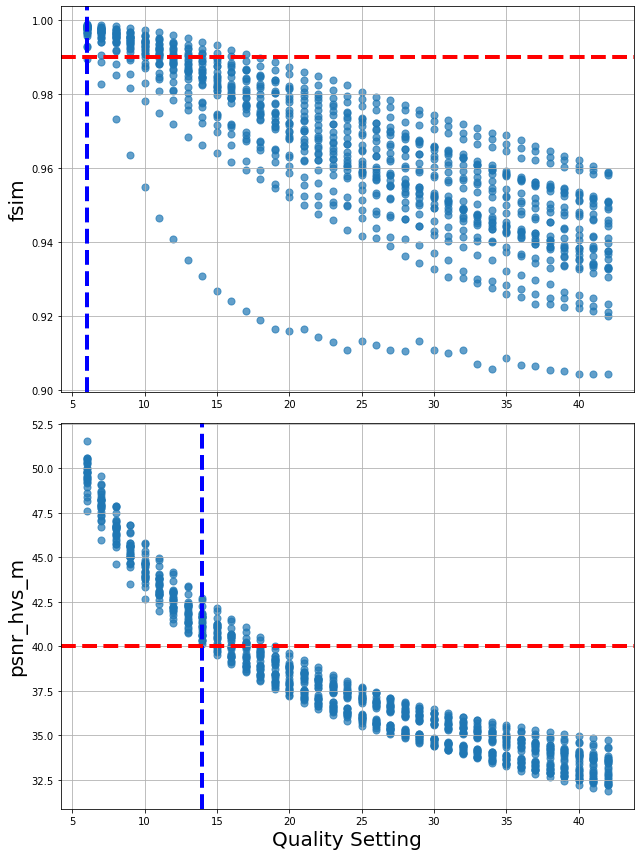

In [2]:
def plot_metrics_scatter(data_name):
    merged = pd.read_csv(f'results/{data_name}.csv')
    metrics_thresholds = [('fsim', 0.99), ('psnr_hvs_m', 40)]
    # Determine the number of subplots needed
    num_plots = len(metrics_thresholds)
    
    # Create a figure with appropriate subplot layout
    # For 2 metrics, we'll use a 1x2 subplot layout
    fig, axs = plt.subplots(num_plots, 1, figsize=(9, 12))
    
    # If only one plot, convert axs to a list to ensure consistent indexing
    if num_plots == 1:
        axs = [axs]
    
    # Iterate through metrics and thresholds
    for i, (metric, threshold) in enumerate(metrics_thresholds):
        # Select the current subplot
        ax = axs[i]
        
        # Find best quality setting
        best_qs = merged[merged[metric] > threshold].groupby('source_file')['quality_setting'].max().min()

        # Vertical line for best quality setting
        ax.axvline(x=best_qs, color="blue", linestyle="--", linewidth=4)

        # Scatter plot
        ax.scatter(merged["quality_setting"], merged[metric], s=50, alpha=0.7)
        
        # Horizontal threshold line
        ax.axhline(y=threshold, color="red", linestyle="--", linewidth=4)
        
        
        
        # Labels and title
        if i == 1:
            ax.set_xlabel("Quality Setting", fontsize=20)
        ax.set_ylabel(metric, fontsize=20)
        print(f"QS for {metric}: ", best_qs)
        # ax.set_title(f"QS={best_qs}", fontsize=20)
        ax.grid(True)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()

plot_metrics_scatter('chest-512')